<a href="https://colab.research.google.com/github/zihanmanbit/Python-Programming-and-Basic-Data-Science-Project/blob/main/PDS_Project_on_Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Dataset

[Stroke Prediction Dataset from Kaggle](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

Data Collection and Processing

In [ ]:
# Loading the dataset
stroke_data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

# Viewing first few rows of the dataset
print(stroke_data.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


Data Preprocessing

In [ ]:
# Checking for missing values
print(stroke_data.isnull().sum())

# Statistical measures about the data
print(stroke_data.describe())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.0000

Handling Missing Values

In [ ]:
# Filling missing values in 'bmi' with median
stroke_data['bmi'].fillna(stroke_data['bmi'].median())

,bmi
0,36.6
1,28.1
2,32.5
3,34.4
4,24.0
...,...
5105,28.1
5106,40.0
5107,30.6
5108,25.6


Converting Categorical Data to Numerical Data

In [ ]:
# Converting categorical columns to numerical
stroke_data = pd.get_dummies(stroke_data, drop_first=True)

Splitting the Features and Target

In [ ]:
# Splitting the Features and Target
X = stroke_data.drop(columns='stroke', axis=1)
Y = stroke_data['stroke']

# Splitting the data into Training data & Test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

Model Training

In [ ]:
# Model Training
model = LogisticRegression(max_iter=5500,solver='saga')
model.fit(X_train, Y_train)

LogisticRegression(max_iter=5500, solver='saga')

Model Evaluation

In [ ]:
# Accuracy on Training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data: ', training_data_accuracy)

# Accuracy on Test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data: ', test_data_accuracy)

Accuracy on Training data:  0.951320939334638
Accuracy on Test data:  0.9510763209393346


Building a Predictive System

In [ ]:
# Predictive System
input_data = (67, 0, 1, 228.69, 36.6, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1)
# Changing the input data to a DataFrame with the correct feature names
input_data_as_df = pd.DataFrame([input_data], columns=model.feature_names_in_)

# Prediction
prediction = model.predict(input_data_as_df)
print(prediction)
if (prediction[0] == 0):
    print('The Person does not have a Stroke')
else:
    print('The Person has Stroke')

[0]
The Person does not have a Stroke


Visualization

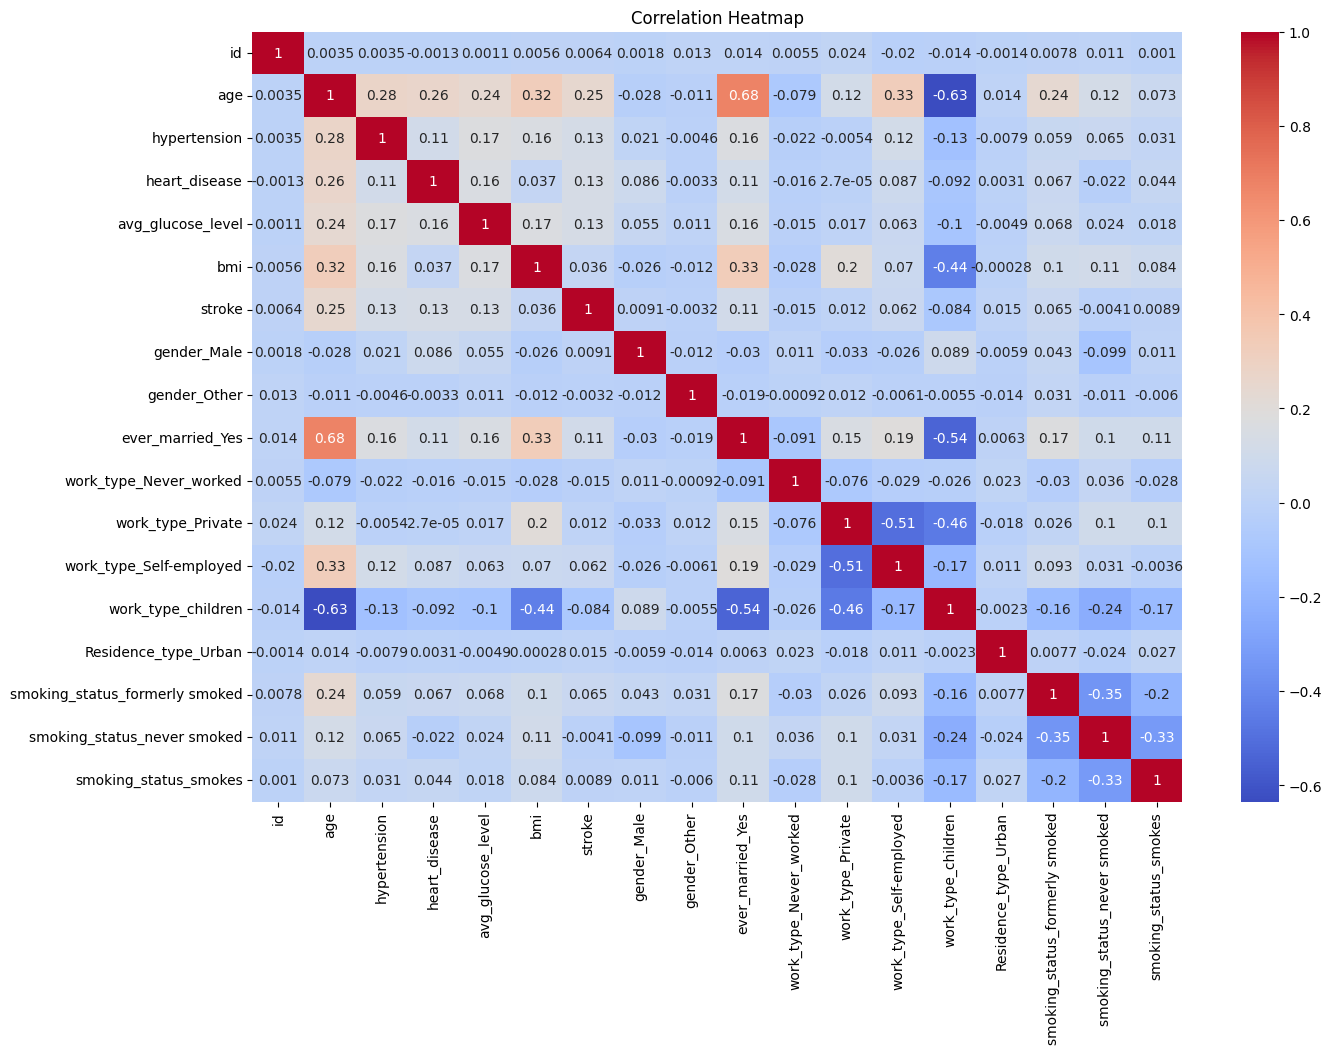

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Computing the correlation matrix
correlation_matrix = stroke_data.corr()

# Plotting the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

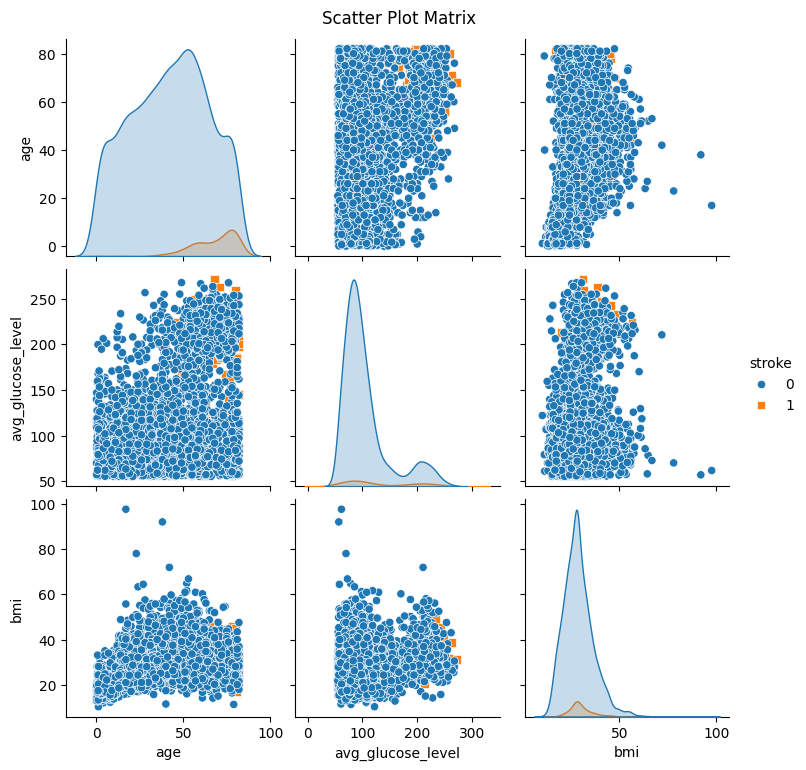

In [ ]:
# Selecting a subset of the dataset for the scatter plot matrix
subset = stroke_data[['age', 'avg_glucose_level', 'bmi', 'stroke']]

# Plotting the scatter plot matrix
sns.pairplot(subset, hue='stroke', markers=['o', 's'])
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.show()

Submitted by:
*   *Zihan Manbit*
*   *PDS-05(MU)*
*   *PDS ID No.: 19*


